#**3장. 수치 예측**

---

#**3-1. 선형 회귀**

선형회귀(Linear Regression)은 기울기와 절편을 찾아냅니다. 즉 선형 회귀의 주요 관심사는 '절편과 기울기를 찾는 것'입니다. 

예) $x$가 3일때 $y$는 25, $x$가 4일때 $y$는 32, $x$가 5일 때 $y$가 39라면 기울기와 절편의 값으로 적절한 것은?
답은 기울기는 7 절편은 4

각 점을 따라 만든 1차 함수를 '선형 회귀로 만든 모델'이라고 한다. 이것을 바탕으로 새로운 점에 대한 예측을 할 수 있다. 

# **문제 해결을 위해 당뇨병 환자의 데이터 준비하기**

목표는 '당뇨병 혼자의 1년 후 병의 진전된 정도를 예측하는 모델을 만드는 것'

문제를 해결하기 위해서 충분한 양의 입력 데이터와 타깃 데이터를 준비해야 함.


**사이킷런에서 당뇨병 환자 데이터 가져오기**

머신러닝, 딥러닝 패키지에는 인공지능학습을 위한 데이터 세트가 준비되어있음

사이킷 런의 데이터 세트 중 당뇨병 환자의 데이터 세트를 사용

**1. load_diabetes()함수로 당뇨병 데이터 준비하기**

사이킷런의 datasets 모듈에 있는 load_diabetes()함수를 임포트한 후 매개변수 값을 넣지 않은 채로 함수를 호출하면 diabeetes에 당뇨병 데이터가 저장됨.

In [0]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

**입력과 타깃 데이터의 크기 확인하기**

diabetes의 속성 중 data 속성과 target 속성에는 우리에게 필요한 입력과 타깃 데이터가 넘파이 배열로 저장되어 있음. 넘파이 배열의 크기는 shape 속성에 저장되어 있으므로 다음과 같이 shape 속성을 출력하여 입력 데이터와 타깃 데이터의 크기를 확인.


In [0]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


data는 442*10 크기의 2차원 배열이고 target은 442개의 요소를 가진 1차원 배열임.
diabetes.data는 442개의 행과 10개의 열로 구성되어 있는데, 여기서 행은 샘플(sample)이고, 열은 샘플의 특성(feature)임.

샘플이란 당뇨병 환자에 대한 특성으로 이루어진 데이터 1세트이고, 특성은 당뇨병 데이터의 여러 특징들을 의미.
이 때, 입력 데이터의 특성은 다른 말로 속성, 독립 변수(independent variable), 설명 변수(explanatory variable) 등으로 호칭. 머신러닝에서는 널리 통용되는 '특성'으로 칭하기로 함.



**입력 데이터 자세히 보기**

diabetes.data에 저장된 입력 데이터를 일부만 출력. 슬라이싱을 사용

In [0]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

안쪽 대괄호에는 특성의 값 10개가 나열되게 되는데, 3개의 샘플을 추출했으므로 3*10크기의 배열이 나타남.

**4. 타깃 데이터 자세히 보기**

타깃데이터를 출력해 보는데, 이 때 배열의 첫 번째 요소부터 추출한다면 첫 번째 인덱스는 생략해도 무관. 

In [0]:
diabetes.target[0:3]

array([151.,  75., 141.])

타깃 데이터는 10개의 요소로 구성된 샘플 1개에 대응. 슬라이싱한 입력 데이터의 첫 번재 샘플은 151.이라는 타깃 데이터에 대응함. 여기서 수치 자체에 대한 해석은 전문가의 영역이기에 불필요함. 입력 데이터와 타깃 데이터의 수치만 보고 둘 사이의 규칙만 찾으면 됨. 

# **당뇨병 환자 데이터 시각화하기**

입력 데이터와 타깃 데이터의 관계를 눈으로 확인하기 위해 데이터를 시각화.

**1. 맷플롯립의 SCATTER() 함수로 산점도 그리기**

당뇨병 데이터 세트에는 10개의 특성이 있었는데, 이 특성을 모두 표현하려면 3차원 이상의 그래프를 그려하 함. 3차원 이상의 그래프를 그리는 것은 불가능하므로 1개의 특성만 사용.

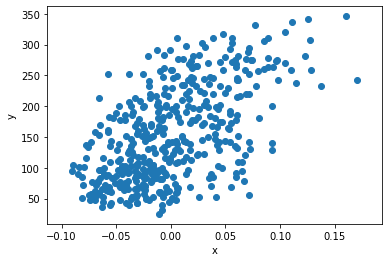

In [0]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

그래프의 $x$축은 diabetes.data의 세 번째 특성이고, $y$축은 diabetes.target 이다. 그래프에서 세 번째 특성과 타깃 데이터 사이에 정비례 관계가 있음을 알 수 있음.

**2. 훈련 데이터 준비**

매번 diabetes.data를 입력하여 입력 데이터의 속성을 참고하는 방법은 매우 번거로움. 따라서 입력 데이터의 세 번째 특성(입력 데이터)을 미리 분리하여 변수 $x$에 저장하고 타깃 데이터는 변수 $y$에 저장. 

In [0]:
x = diabetes.data[:, 2]
y = diabetes.target

# **3-2 경사 하강법으로 학습하는 방법**

**선형 회귀와 경사 하강법의 관계**

선형 회귀의 목표는 입력 데이터($x$)와 타깃 데이터($y$)를 통해 기울기($a$)와 절편($b$)을 찾는 것. 즉, 산점도 그래프를 잘 표현하는 직선의 방정식을 찾는 것이 회귀 알고리즘의 목표.


경사 하강법은 그 방법 중의 하나. 경사 하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기(별화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘.

**예측값이란?**

입력과 출력 데이터(x, y)를 통해 규칙(a, b)를 발견하면 모델을 만들었다고 함. 그 모델에 대해 새로운 입력값을 넣어서 나오는 출력값이 모델을 통해 예측한 값. 여기서 $\widehat{y}$은 타깃 데이터를 표현하는 y라는 문자와 구분하기 위해서 사용. 

**예측값과 변화율**

딥러닝 분야에서는 기울기 $a$를 종종 가중치를 의미하는 $w$나 계수를 표현하는 $\theta$로 표기. 그리고 $y$는 $\widehat{y}$으로 표기하며 읽을 때는 와이-햇 (y-hat)이라고 읽음. 앞으로는 $y$=$ax$+$b$로 알고 있던 모델을 $\widehat{y}$ = $wx$+$b$로 표기함. 여기서 가중치 $w$와 절편 $b$는 알고리즘이 찾은 규칙을 의미하고, $\widehat{y}$은 우리가 예측한 값을 의미.


#**예측값으로 올바른 모델 찾기**

**훈련 데이터에 잘 맞는 w와 b를 찾는 방법**

① 무작위로 w와 b를 정함(무작위로 모델 만들기)

② x에서 샘플 하나를 선택하여 $\widehat{y}$을 계산(무작위로 모델 예측하기)

③ $\widehat{y}$과 선택한 샘플의 진짜 y를 비교.(예측한 값과 진짜 답 비교하기, 틀릴 확룔 (99%)

④ $\widehat{y}$이 y와 더 가까워지도록 w, b를 조정.(모델 조정하기)

⑤ 모든 샘플을 처리할 때까지 다시 ②~④ 항목을 반복.

위의 방법은 아주 직관적이나 모델이 복잡할수록 체계적인 방법이 필요함. 

#**훈련 데이터에 맞는 w와 b 찾아보기**

**1. w와 b 초기화하기**

아직 w와 b를 어떻게 초기화할지 규칙을 정하지 않았으므로 임시 규칙을 정함

In [0]:
w = 1.0
b = 1.0

**2. 훈련 데이터의 첫 번째 샘플 데이터로 $\widehat{y}$ 얻기**

임시로 만든 모델로 훈련 데이터의 첫 번 째 샘플 x[0]에 대한 $\widehat{y}$을 계산. 계산한 $\widehat{y}$은 y_hat 변수에 저장


In [0]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


**3. 타깃과 예측 데이터 비교하기**

첫 번째 샘플 x[0]에 대응하는 타깃값 y[0]을 출력하여 y_hat 값과 비교

In [0]:
print(y[0])

151.0


**4. w 값 조절해 예측값 바꾸기**

y_hat 값은 1.06으로 예측했으나 타깃은 151.0이므로 차이가 매우 큼.

w와 b를 무작위 값으로 정했기 때문에 차이가 매우 큰 것.

w와 b를 조금씩 변경해서 y_hat의 증감을 살표보고 y_hat이 y[0]이 가까워 질 수 있도록 해야함.

먼저 w를 0.1만큼 증가시키고 관찰

In [0]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


w값을 0.1만큼 증가시킨 다음 값을 다시 예측하여 y_hat_inc에 저장. 저장한 값은 y_hat보다 증가한 것을 확인.

**5. w 값 조정한 후 예측값 증가 정도 확인**

w가 0.1만큼 증가했을 때 y_hat이 얼마나 증가했는지 계산해 보려면 y_hat이 증가한 양을 w가 증가한 양으로 나누어 보면 됨.

In [0]:
w_rate = (y_hat_inc - y_hat) / ( w_inc - w)
print(w_rate)

0.061696206518688734


첫 번째 훈련 데이터 x[0]에 대한 w의 변화율은 훈련 데이터의 첫 번째 샘플인 x[0].

위의 경우 y_hat의 값은 y 보다 작으므로 y_hat의 값을 증가시켜야 함.

이때 변화율은 양수이므로 w 값을 증가시키면 y_hat의 값을 증가시킬 수 있고, 변화율이 음수일 때 y_hat의 값을 증가시키려면 w값을 감소시키면 됨. 하지만 이런 방법은 변화율이 양수일떄와 음수일 때를 구분해야 하므로 매우 번거로움. 

따라서 이 문제를 효율적으로 해결하는 방법이 바로 변화율 그 자체.

#**변화율로 가중치 업데이트하기**

선형 회귀의 목표는 y에 가까운 $\widehat{y}$을 출력하는 모델을 찾아내는것.
따라서 x와 y의 방정식이 아닌 w와 $\widehat{y}$에 대한 방정식을 사용함. 먼저 w와 b를 변화율로 업데이트 해야 함.

**변화율이 양수일 때 가중치를 업데이트 하는 방법**

변화율이 0보다 클 때, w가 증가하면 y_hat도 증가. 이 때 변화율이 양수인 점을 이용하여 변화율을 w에 더하는 방법으로 w를 증가시킬 수 있음.

**변화율이 음수일 때 가중치를 업데이트 하는 방법**

변화율이 0보다 작을 때, w가 증가하면 y_hat은 감소. 따라서 변화율이 음수인 점을 이용하여 변화율을 더하는 방법으로 y-hat의 값을 증가시킬 수 있음. w에 w_rate를 더하면 됨. 가중치 w를 업데이트 하는 방법은 두 경우 모두 w + w_rate. 

In [0]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


#**변화율로 절편 업데이트하기**

절편 b에 대한 변화율을 구한 다음 변화율로 b를 업데이트. b를 0.1만큼 증가시킨 후 y_hat이 얼마나 증가했는지 계산하고 변화율도 계산.

In [0]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [0]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


b가 증가한만큼 y_hat도 증가하는데, 1차 함수에서 절편이 1만큼 증가하면 그래프 위치가 y 방향으로 1만큼 올라가므로 이는 예상할 수 있음.

즉, b를 업데이트하기 위해서는 변화율이 1이므로 단순히 1을 더하면 됨.

In [0]:
b_new = b + 1
print(b_new)

2.0


위는 y_hat을 증가시켜야 하는 상황을 가정하고 w와 b를 업데이트하는 방법이나, 이 방법이 조금 수동적인 방법인데, 왜냐하면 이 방법이 아래의 상황에 대해 적합하게 대처할 수 없기 때문.

● y_hat이 y에 한참 미치지 못 하는 값인 경우, w와 b를 더 큰 폭으로 수정할 수 없음.(변화율만큼 수정을 해도 특별한 기준을 정하기가 어려움)

● y_hat이 y보다 커지면 y_hat을 감소시카지 못함.

위의 문제를 해결하기 위해서는 w와 b를 더 능동적으로 업데이트 하는 방법인 오차 역전파를 알아야 함.


#**오차 역전파로 가중치와 절편을 더 적절하게 업데이트**

오차 역전파(backpropagation)는 $\widehat{y}$와 y의 차이를 이용하여 w와 b를 업데이트함. 이 방법은 오차가 연이어 전파되는 모슴으로 수행됨. 

**가중치와 절편을 더욱 적절하게 업데이트 하는 방법**

y에서 $\widehat{y}$을 뺀 오차의 양을 변화율에 곱하는 방법으로 w를 업데이트하면 $\widehat{y}$이 y보다 많이 작은 경우 w와 b를 많이 바꿀 수 있음. 또한 $\widehat{y}$이 y를 지나치면 w와 b의 방향또한 바꿔줌.

**1. 오차와 변화율을 곱하여 가중치 업데이트**

x[0]일 때 w의 변화율과 b의 변화율에 오차를 곱한 다음 업데이트된 w_new와 b_new를 출력해보고, 결괏값을 보면 w와 b가 각각 큰 폭으로 바뀌었음을 알 수 있음.

In [0]:
err = y[0] - y_hat
w_new = w + w_rate *err
b_new = b +1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


**2. 두 번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구함**

w_rate 식을 정리했을 때 샘플값과 같아진다는 것을 알았으므로 앞으로 w_rate를 별도로 계산하지 않고 샘플값을 그대로 사용. 즉, 여기서 x[1]이 w_rate가 됨.

In [0]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


이러한 방식으로 모든 샘플을 사용해 가중치와 절편을 업데이트.

**3. 전체 샘플을 반복하기**

전체 샘플에 대해 앞의 과정을 반복하는 코드는 다음과 같음.

In [0]:
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w+ w_rate * err
  b = b + 1 * err
print(w,b)

587.8654539985689 99.40935564531424


파이썬의 zip()함수는 여러 개의 배열에서 동시에 요소를 하나씩 꺼내줌. 여기서 for문을 사용하고 변수 이름만 달라졌을 뿐, 코드는 이전과 동일. 여기서는 입력 x와 타깃 y 배열에서 요소를 하나씩 꺼내요 err를 계산하고 w와 b를 업데이트.

**4. 과정 3을 통해 얻어낸 모델이 전체 데이터 세트를 잘 표현하는지 그래프를 그려 알아보기**

산점도 위에 w와 b를 사용한 직선을 그려보면 금방 알 수 있음. 직선 그래프를 그리려면 시작점과 종료점의 x 좌표와 y 좌표를 plot 함수에 전달하면 됨. x 좌표 2개 [-0.1, 0.15]를 지정하고 y 좌표값은 w와 b를 사용해 계산하면 그래프를 쉽게 그릴 수 있음.

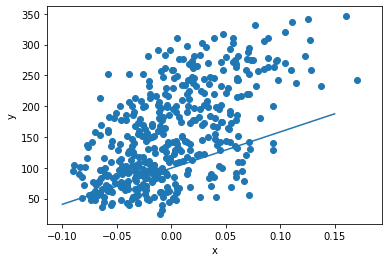

In [0]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

조금 더 완벽한 직선을 얻기 위해서는 반복을 해야함.

**5. 여러 에포크를 반복하기**

보통 경사 하강법에서는 주어진 훈련 데이터로 학습을 여러 번 반복. 이렇게 전체 훈련 데이터를 모두 이용하여 한 단위의 작업을 진행하는 것을 에포크(epoch)라고 함. 일반적으로 수십~수천 번의 에포크를 반복. 위의 직선은 데이터의 중심에서 벗어났으므로 100번의 에포크를 반복하며 직선이 어떻게 이동하는지 확인. 

In [0]:
for i in range(1,100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w,b)

913.5973364345905 123.39414383177204


w와 b를 이용하여 이 진선을 그래프로 나타내면

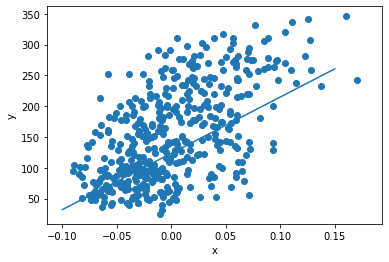

In [0]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

따라서 이 데이터에 맞는 머신러닝 모델은

$\widehat{y}$ = 913.6x + 123.4

**6. 모델로 예측하기**

입력 x에 없었던 새로운 데이터가 발생했다고 가정. 이 데이터에 대해 예측값을 얻으려면 찾은 모델에 x를 넣고 계산하기만 하면 됨. 
예를 들어 x가 0.18일 때 $\widehat{y}$의 값을 예측해볼 수 있음.

In [0]:
x_new = 0.18
y_pred = x_new * w+ b
print(y_pred)

287.8416643899983


이 데이터를 산점도 위에 나타내면

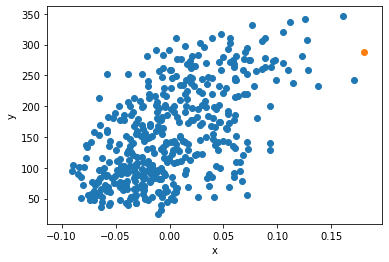

In [0]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

위 그래프 오른색 점이 바로 x가 0.18일 때 예측한 $\widehat{y}$로 찍은 점. 산점도의 추세를 보니 적절한 것을 알 수 있음. 

#**3-3 손실 함수와 경사 하강법의 관계**

경사 하강법에 실제로 어떤 개념이 사용되었는지 알 수 있다.

경사 하강법을 좀 더 기술적으로 표현하면 '어떤 손실 함수(loss function)가 정의되었을 때 손실 함수의 값이 최소가 되는 지점을 찾아가는 방법'임.
손실 함수란 예상한 값과 실제 타깃값의 차이를 함수로 정의한 것.
'오차를 변화율에 곱하여 가중치와 절편 업데이트한 것'은 '제곱 오차'라는 손실 함수를 미분한 것과 같다.

#**손실 함수의 정체**

제곱 오차(squared error)는 타깃값과 예측값을 뺀 다음 제곱한 것. 제곱 오차를 수식으로 나타내면

SE = (y - $\widehat{y}$)^2

이 때 제곱 오차가 최소가 되면 산점도 그래프를 가장 잘 표현한 직선이 그려짐.

즉, 제곱 오차의 최솟값을 찾는 방법을 알면 모델을 쉽게 만들 수 있음.

제곱 오차 함수의 최솟값을 알아내려면 기울기에 따라 함수의 값이 낮은 쪽으로 이동해야 함. 기울기를 구하려면 제곱 오차를 가중치나 절편에 대해 미분하면 됨. 

**가중치에 대하여 제곱 오차 미분하기**

제곱 오차를 가중치(w)에 대하여 편미분하면

dSE/dw = [d(y-$\widehat{y}$)^2]/dw = 2(y=$\widehat{y}$)(-d$\widehat{y}$/dw) = 2(y-$\widehat{y}$)(-x) = (-2y-$\widehat{y}$)x

y는 준비된 타깃 데이터이므로 w의 함수가 아니고 $\widehat{y}$은 w의 함수인 점을 조심해야 함.

따라서 y는 그대로 두고 -$\widehat{y}$에 대해서만 미분.

$\widehat{y}$를 w에 대해 미분하면 상수항 b는 사라지고 x만 남음. 제곱 오차를 가중치에 대하여 미분한 결과는

dSE/dw = -2(y-$\widehat{y}$)x

손실 함수에 상수를 곱하거나 나누어도 최종 모델의 가중치나 절편에 영향을 주지는 않으므로 -(y-$\widehat{y}$)x를 -2(y-$\widehat{y}$)x 대신 사용하기로 하자.

가중치에 대한 제곱 오차의 변화율을 구했으므로 가중치 업데이트에 변화율을 더했던 것과 비슷한 방법으로 가중치를 업데이트한다.

여기서는 w 에서 변화율을 빼는데, 변화율을 더하지 않고 빼는 이유는 손실 함수의 낮은 쪽으로 이동하려 하기 때문이다.

w = w - dSE/dw = w + (y - $\widehat{y}$)x

In [0]:
y_hat = x_i * w + b
err = y_i - y_hat 
w_rate = x_i
w = w + w_rate * err

**절편에 대하여 제곱 오차 미분하기**

절편에 대하여 제곱 오차를 미분하는데, 처음부터 1/2를 곱한 제곱 오차 공식을 사용한다.

dSE/db = d[1/2(y - $\widehat{y}$)^2]/db = (y - $\widehat{y}$)(-d$\widehat{y}$/db) = (y - $\widehat{y}$)(-1) = -(y-$\widehat{y}$)1

미분 과정은 편미분 과정과 매우 비슷. 

$\widehat{y}$ = w*x+b이므로 $\widehat{y}$를 b에 대해 미분하면 wxb항은 사라지고 b의 계수인 1만 남음.

가중치에서 변화율을 뺐던 이유와 같은 이유로 절편에서 변화율을 뺀다.

b = b - dSE/db = b + (y-$\widehat{y}$)

이 식은 아래의 코드와 정확히 일치함.

In [0]:
err = y_i - y_hat
b = b + 1 * err

손실 함수에 대해 일일히 변화율의 값을 계산하는 대신 편미분을 사용하여 변화율을 계산한다. 변화율은 AI분야에서 특별히 그레이디언트(gradient, 경사)라고 부름. 

#**3-4 선형 회귀를 위한 뉴런 제작**

경사 하강법 알고리즘을 Neuron이라는 이름의 파이썬 클래스로 만들 수 있음. 



#**Neuron 클래스 만들기**

아래는 Neuron 클래스의 전체 구조.

In [0]:
class Neuron:
  
  def __init__(self):
   #초기화 작업 수행
   ...

   #필요한 메서드 추가
   ... 

신경망 알고리즘은 실제 뇌의 뉴런과 아무 관계가 없고, 요즘 연구자들은 '뉴런'이 아닌 '유닛(unit)'이라는 명칭을 사용함. 


**1. __init__() 메서드 작성하기**

__init__() 메서드에 필요한 변수를 선언한다.
이 때 가중치 w와 절편 b는 시작값이 있어야 하므로 임의로 1.0을 지정한다.



In [0]:
def __init__(self):
  self.w = 1.0
  self.b = 1.0

**2. 정방향 계산 만들기**

정방향 계산을 위한 메서드를 정의하는데, 정방향 계산이란 뉴런으로 도식화한 상태에서 $\widehat{y}$을 구하는 방향을 보고 만든 용어임. 

메서드 이름은 forpass라고 정하고, 지금까지의 모델은 1차 함수였으므로 forpass() 메서드도 1차 함수를 통해 예측값을 계산. 가중치와 절편은 인스턴스 변수 w와 b에 저장되어 있는 값을 사용.

In [0]:
def forpass(self,x):
  y_hat = x * self.w + self.b  # 직선 방정식을 계산한다.
  return y_hat

y, x, b가 뉴런의 왼쪽에서 오른쪽 방향으로 흘러 $\widehat{y}$가 되고, 따라서 정방향 계산이라는 용어를 사용한다.

정방향 계산을 정리하면 아래와 같다.

$\widehat{y}$ = w*x + b

**3. 역방향 계산 만들기**

위의 정방향과는 다르게, 정방향 계산을 통해 $\widehat{y}$과 y의 차이를 얻었고, 그 오차가 뉴런의 오른쪽 방향에서 왼쪽으로 흐른다. 따라서 이것을 역방향 계산이라고 부른다.

즉, 오차가 역전파(backpropagation)된다. 

그러면 역방향 계산도 메서드로 구현할 수 있다.

In [0]:
def backprop(self, x, err):
  w_grad = x * err  # 가중치에 대한 그레이디언트를 계산한다.
  b_grad = 1* err    # 절편에 대한 그레이디언트를 계산한다.
  return w_grad, b_grad

편미분을 통해 얻었던 수식과 동일하다.

가중치의 그레이디언트는 x와 오차(err)를 곱하고 절편의 그레이디언트는 1과 오차(err)을 곱하면 된다. 이후 이 값들로 가중치와 절편을 업데이트하여 점차 손실 함수가 가장 작은 값인 가중치와 절편을 얻을 수 있다.

**4. Neuron 클래스 작성**

이제 Neuron 클래스를 작성할 수 있는데, 코드는 간단하지만 딥러닝이 사용하는 경사 하강법 알고리즘의 핵심이 들어가 있다. 딥러닝은 이러한 간단한 연산의 조합으로 이루어져 있다.


In [0]:
class Neuron:
  def __init__(self):
    self.w = 1.0   # 가중치를 초기화
    self.b = 1.0   # 절편을 초기화
  
  def forpass(self, x):
    y_hat = x * self.w + self.b   # 직선 방정식을 계산.
    return y_hat
  
  def backprop(self, x, err):
    w_grad = x * err  # 가중치에 대한 그레이디언트를 계산
    b_grad = 1 * err  # 절편에 대한 그레이디언트를 계산
    return w_grad, b_grad

이제 과정 **1~4**를 조합하여 데이터를 통해 가중치와 절편을 업데이트 할 수 있도록 fit() 메서드를 구현해야 한다. 

이 메서드는 for 문으로 구현했던 코드와 매우 유사함.

**5. fit() 메서드 구현**

fit() 메서드의 구조는 처음에 forpass() 메서드를 호출하여 $\widehat{y}$를 구하고, 오차를 계산하고 backprop() 메서드를 호출하여 가중치와 절편에 대한 그레이디언트를 구한다. 마지막으로 그레이디언트를 가중치와 절편에서 빼면 가중치와 절편의 업데이트가 끝난다. 이 과정을 모든 샘플에 대해 수행하고, 적절한 가중치와 절편이 구해질 만큼 반복하면 됨.

In [0]:
def fit(self, x, y, epochs=100):
  for i in range(epochs):       # 에포크만큼 반복
    for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복
      y_hat = self.forpass(x_i) # 정방향 계산
      err = -(y_i - y_hat)      # 오차 계산
      w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
      self.w -= w_grad   # 가중치 업데이트
      self.b -= b_grad   #  절편 업데이트

**6. 모델 훈련하기(학습시키기)**

실제로 모델을 만들고 훈련해(학습해)볼 수 있다. 

Neuron 클래스의 객체 neuron을 생성하고 fit() 메서드에 입력 데이터(x)와 타깃 데이터(y)를 전달하면 됨.


In [0]:
class Neuron:

  def __init__(self):
    self.w = 1.0
    self.b = 1.0

  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
          y_hat = self.forpass(x_i)
          err = -(y_i - y_hat)
          w_grad, b_grad = self.backprop(x_i, err)
          self.w -= w_grad
          self.b -= b_grad

In [0]:
neuron = Neuron( )
neuron.fit(x, y)

**7. 학습이 완료된 모델의 가중치와 절편 확인**

학습이 완료된 가중치와 절편은 neuron.w와 neuron.b에 저장되어 있음. 이 값을 활용하여 산점도 위에 직선 그래프를 그릴 수 있다.

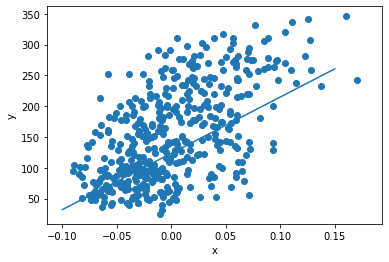

In [0]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

이것은 경사 하강법을 적용한 뉴런을 구현한 것이다. 

신경망 모델을 사용하는 딥러닝은 항상 경사 하강법 알고리즘을 사용하므로 경사 하강법 알고리즘이 딥러닝의 핵심 요소 중 하나이다. 